<img src="Anime_recommender_logo.jpeg" style="width:300px;height:160px"/>


<div style="font-size: 25px">
<font color='blue'> <b>Discovering Your Next Favorite Show!🔥❤️</b></font> 


<img src="Home_banner.jpg" style="width:1000
px;height:600px"/>

<a id="cont"></a>

## Table of Contents
* <b>[1. Project Overview](#chapter1)
    * [1.1 Introduction](#section_1_1)
        * [1.1.1 Problem Statement](#sub_section_1_1_1)
        * [1.1.2 Aim](#sub_section_1_1_2)
        * [1.1.3 Objectives](#section_1_1_3)
* <b>[2. Importing Packages](#chapter2)
* <b>[3. Loading Data](#chapter3)
* <b>[4. Data Cleaning](#chapter4)
* <b>[5. Exploratory Data Analysis](#chapter5)
* <b>[6. Collaborative based Filtering](#chapter6)
* <b>[7. Content based Filtering](#chapter7)
* <b>[8. Hyperparameter Tuning](#chapter8)
* <b>[9. Recommendations](#chapter9)
* <b>[10. Conclusion](#chapter10)
* <b>[11. Team Members](#chapter11)

## 1. Project Overview <a class="anchor" id="chapter1"></a>

### 1.1 Introduction <a class="anchor" id="section_1_1"></a>

Welcome to the world of AnimeXplore, where your next favorite anime is just a click away! Imagine a universe where every anime lover finds their perfect match, diving into captivating stories, unforgettable characters, and breathtaking adventures tailored to their unique tastes. At AnimeXplore, we’re on a mission to revolutionize how you discover anime by building a cutting-edge recommender system that’s as vibrant and dynamic as the anime titles it curates. Whether you're a seasoned otaku or a newcomer to the anime world, prepare to embark on an exhilarating journey through the ultimate anime discovery experience.

Anime, a unique form of animation originating from Japan, has a rich history that dates back to the early 20th century. From its humble beginnings with short, silent films, anime has evolved into a global phenomenon, captivating audiences with its diverse genres, intricate plots, and artistic brilliance. Notable milestones in anime history include the release of classics like "Astro Boy" in the 1960s, the rise of Studio Ghibli with timeless masterpieces such as "My Neighbor Totoro" and "Spirited Away," and the explosive popularity of series like "Naruto," "Attack on Titan," and "My Hero Academia."

The impact of anime on global pop culture is undeniable. It has not only entertained millions but also influenced fashion, music, and even technology. Conventions dedicated to anime, such as Anime Expo and Comic-Con, draw massive crowds, celebrating the community and creativity that anime fosters. Streaming platforms now host extensive libraries of anime, making it more accessible than ever before. The stories told through anime resonate deeply with fans, offering both escapism and reflection on real-world issues.


#### 1.1.1 Problem Statement <a class="anchor" id="sub_section_1_1_1"></a>

In the vast and ever-expanding realm of anime, finding the next show to binge-watch can be an overwhelming and time-consuming task. With thousands of anime titles available, how can viewers effortlessly discover series that align with their unique preferences and tastes? Traditional recommendation methods often fall short, offering generic suggestions that fail to capture the diversity and richness of the anime world. This disconnect leaves anime fans sifting through countless titles, unsure of what to watch next.


#### 1.1.2 Aim <a class="anchor" id="sub_section_1_1_2"></a>

This study is aimed at developing a collaborative and content-based recommender system for AnimeXplore that accurately predicts user ratings for unseen anime titles, thereby enhancing the anime discovery experience by delivering personalized, relevant and exciting recommendations.


#### 1.1.3 Objectives <a class="anchor" id="section_1_1_3"></a>

1. Data Cleaning and Analysis
2. Insight Generation
3. Collaborative Filtering
4. Content-Based Filtering
5. User Interface and Experience
6. Evaluation and Improvement


## 2. Importing Packages <a class="anchor" id="chapter2"></a>

In [4]:
# Importing pandas for data manipulation and analysis
import pandas as pd

# Importing numpy for numerical operations and handling arrays
import numpy as np

# Importing seaborn for statistical data visualization
import seaborn as sns

# Importing matplotlib for plotting graphs and charts
import matplotlib.pyplot as plt

# Import the wordcloud
from wordcloud import WordCloud

# Import the squarify
import squarify

# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Importing the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# To transform text data into TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import linear_kernel

from scipy.sparse import csr_matrix

from sklearn.decomposition import TruncatedSVD

from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import mean_squared_error

# Importing the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Importing MLflow for experiment tracking
import mlflow
import mlflow.sklearn

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

## 3. Loading Data <a class="anchor" id="chapter3"></a>

The data used for this project was located in three files: `anime.csv`,`train.csv` and `test.csv`. To better manipulate and analyze these files, they were loaded into separate Pandas DataFrames using the pandas function, `.read_csv()`. The DataFrame created from anime.csv was referred to as `anime_df`, train.csv was referred to as `train_df` and the DataFrame created from test.csv was referred to as `test_df`. For demonstrating the column index in both DataFrames, `index_col=False` was implemented to ensure the default integer index is used

In [5]:
# Load the Anime CSV file
anime_df = pd.read_csv('anime.csv')

# Load the Train CSV file
train_df = pd.read_csv('train.csv')

# Load the Test CSV file
test_df = pd.read_csv('test.csv')

anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [12]:
train_df.head()

,user_id,anime_id,rating
0,1,11617,10
1,1,11757,10
2,1,15451,10
3,2,11771,10
4,3,20,8


In [13]:
test_df.head()

,user_id,anime_id
0,40763,21405
1,68791,10504
2,40487,1281
3,55290,165
4,72323,11111


<div class="alert alert-block alert-danger">
<b>To avoid making any major unnecessary changes to the original data</b>, copies of the DataFrames will be created using the train_df.copy() and test_df.copy() methods. These copies will be referred to as train_copy_df and test_copy_df, respectively.
</div>

In [14]:
# Create a copy of the dataframes
anime_df_copy = anime_df.copy()
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

First we are looking at the shape of the dataframes by using `.shape`.

In [15]:
# Displays the number of rows and columns
anime_df_copy.shape

(12294, 7)

**Results** : The anime dataset consists of 12294 rows (observations) and 7 columns (features).

In [16]:
# Displays the number of rows and columns
train_df_copy.shape

(5703554, 3)

**Results** : The train dataset consists of 5703554 rows (observations) and 3 columns (features).

In [17]:
# Displays the number of rows and columns
test_df_copy.shape

(633686, 2)

**Results** : The test dataset consists of 633686 rows (observations) and 2 columns (features).

In [18]:
# Display summary information about the DataFrame.
anime_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [19]:
# Display summary information about the DataFrame.
train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703554 entries, 0 to 5703553
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 130.5 MB


In [20]:
# Display summary information about the DataFrame.
test_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633686 entries, 0 to 633685
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   633686 non-null  int64
 1   anime_id  633686 non-null  int64
dtypes: int64(2)
memory usage: 9.7 MB


## 4. Data Cleaning <a class="anchor" id="chapter4"></a>

First, we check for the number of duplicates in each dataset using the `duplicated().sum()` function. Duplicates can lead to misleading results and analyses, which would reduce the accuracy of the dataset.

In [21]:
# Identify and count the duplicates
print("Number of Duplicates in Anime_df_copy:", anime_df_copy.duplicated().sum())

# Identify and count the duplicates
print("Number of Duplicates in Train_df_copy :", train_df_copy.duplicated().sum())

# Identify and count the duplicates
print("Number of Duplicates in Test_df_copy:", test_df_copy.duplicated().sum())

Number of Duplicates in Anime_df_copy: 0
Number of Duplicates in Train_df_copy : 1
Number of Duplicates in Test_df_copy: 0


In [22]:
# Remove duplicates
train_df_copy.drop_duplicates(inplace=True)

# Check for duplicates in training data
train_duplicates = train_df_copy.duplicated().sum()
print("Duplicates in training data:", train_duplicates)

Duplicates in training data: 0


Now we check for the sum of null values in the dataset by using the `isnull().sum()` function.In identifying and addressing missing values, we are ensuring the robustness and reliability of our data analysis and machine learning models.

In [23]:
# Check for missing values in anime_data_copy
print(anime_df_copy.isnull().sum())

# Check for missing values in train_data_copy
print(train_df_copy.isnull().sum())

# Check for missing values in test_data_copy
print(test_df_copy.isnull().sum())

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64
user_id     0
anime_id    0
rating      0
dtype: int64
user_id     0
anime_id    0
dtype: int64


In [24]:
# Handling missing values in anime_df_copy
anime_df_copy['genre'].fillna('Unknown', inplace=True)
anime_df_copy['type'].fillna('Unknown', inplace=True)

# Imputing missing ratings with mean
mean_rating = anime_df_copy['rating'].mean()
anime_df_copy['rating'].fillna(mean_rating, inplace=True)

In [25]:
# Check for missing values in anime_data_copy
print(anime_df_copy.isnull().sum())

# Check for missing values in train_data_copy
print(train_df_copy.isnull().sum())

# Check for missing values in test_data_copy
print(test_df_copy.isnull().sum())

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64
user_id     0
anime_id    0
rating      0
dtype: int64
user_id     0
anime_id    0
dtype: int64


The `episodes` column is of the object data type which is incorrect. The column should be of the integer data type to ensure data consistency and facilitate numeric operations.

In [26]:
# Convert to numeric, coerce errors to NaN
anime_df_copy['episodes'] = pd.to_numeric(anime_df_copy['episodes'], errors='coerce')

# Option 1: Fill NaNs with a default value (e.g., 0)
anime_df_copy['episodes'] = anime_df_copy['episodes'].fillna(0).astype('int64')


The `genre` column contains some inconsistencies that need to be addressed. We will clean this column to ensure consistency and accuracy in the data.


In [27]:

import re

# Function to clean genre names
def clean_genres(genre_str):
    # Remove leading/trailing spaces, convert to lowercase, and remove punctuation
    genres = genre_str.strip()
    genres = re.sub(r'[^\w\s,]', '', genres)  # Remove punctuation
    genres = re.sub(r'\s+', ' ', genres)  # Replace multiple spaces with single space
    return genres

# Function to split genres into a list and strip spaces
def split_and_strip_genres(genre_str):
    # Split the cleaned string into a list and strip spaces from each genre
    genres = [genre.strip() for genre in genre_str.split(',')]
    return genres


def format_genre_list(genre_list):
    
    special_cases = {
        'scifi': 'sci-fi',
       }
    
    
    formatted_genres = [special_cases.get(genre, genre) for genre in genre_list]
    
    return ','.join(formatted_genres)  

# Apply the cleaning function to the 'genre' column
anime_df_copy['cleaned_genre'] = anime_df_copy['genre'].apply(clean_genres)

# Apply the split and strip function
anime_df_copy['genre_list'] = anime_df_copy['cleaned_genre'].apply(split_and_strip_genres)


anime_df_copy['genre'] = anime_df_copy['genre_list'].apply(format_genre_list)

anime_df_copy = anime_df_copy.drop(columns=['cleaned_genre', 'genre_list'])



In [28]:
# Display summary information about the DataFrame.
anime_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  int64  
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 672.5+ KB


**Summary:**
- All missing values were handles
- Any or all duplicates found in each dataframe were dropped
- All the features with incorrect format were converted to the correct format
- The genre column contained inconsistencies that were addressed to ensure data consistency and accuracy


## 5. Exploratory Data Analysis <a class="anchor" id="chapter5"></a>

In this section, we delve deeper into what our data reveals about user ratings and anime characteristics. Our goal is to conduct a thorough exploratory data analysis (EDA) to understand user behavior and anime attributes, which will help us build effective recommendation systems.


**Most and Least Rated Animes:** To understand user preferences and identify standout titles, we analyze both the most and least rated animes.

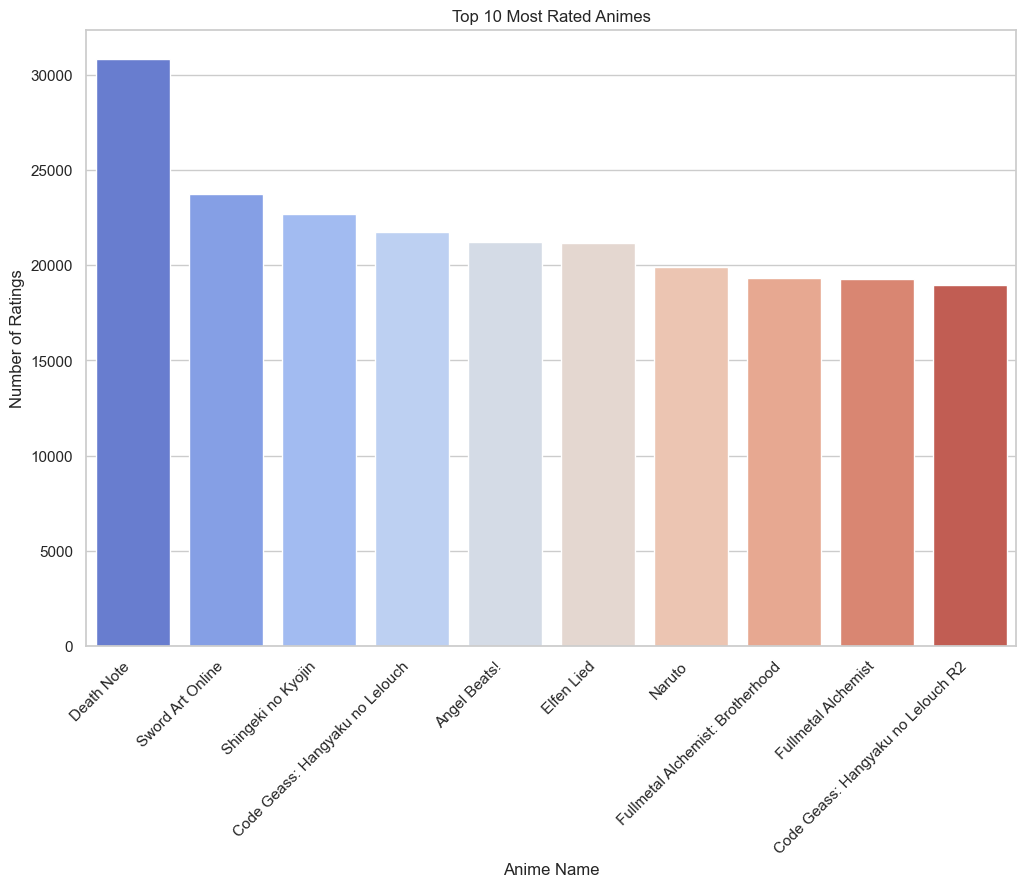

In [29]:

anime_ratings_count = train_df_copy['anime_id'].value_counts()

# Calculate the average rating per anime title
anime_average_rating = train_df_copy.groupby('anime_id')['rating'].mean()

# Merge the two metrics into a single DataFrame
anime_popularity = pd.DataFrame({
    'number_of_ratings': anime_ratings_count,
    'average_rating': anime_average_rating
}).fillna(0)

# Most rated animes with names
most_rated_animes = anime_popularity.sort_values(by='number_of_ratings', ascending=False).head(10)
most_rated_animes = most_rated_animes.merge(anime_df_copy[['anime_id', 'name']], left_index=True, right_on='anime_id')

# Set the Seaborn theme for the plots
sns.set_theme(style="whitegrid")

# Most rated animes plot
plt.figure(figsize=(12, 8))
most_rated_plot = sns.barplot(data=most_rated_animes, x='name', y='number_of_ratings', palette='coolwarm')
most_rated_plot.set_title("Top 10 Most Rated Animes")
most_rated_plot.set_xlabel("Anime Name")
most_rated_plot.set_ylabel("Number of Ratings")
most_rated_plot.set_xticklabels(most_rated_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


**Insights**

- The anime `Death Note` significantly outperforms the other titles in terms of total ratings.
- The bar plot highlights anime titles with the highest average ratings, reflecting their strong appeal and quality. Notable mentions include `Death Note`, `Sword Art Online`, `Shingeki no Kyojin`, `Code Geass: Hangyaku no Lelouch`, `Angel Beats!`, `Elfen Lied`, `Naruto`, `Fullmetal Alchemist: Brotherhood`, `Fullmetal Alchemist`, and `Code Geass: Hangyaku no Lelouch R2`. These animes are recommended for their exceptional quality and popularity.


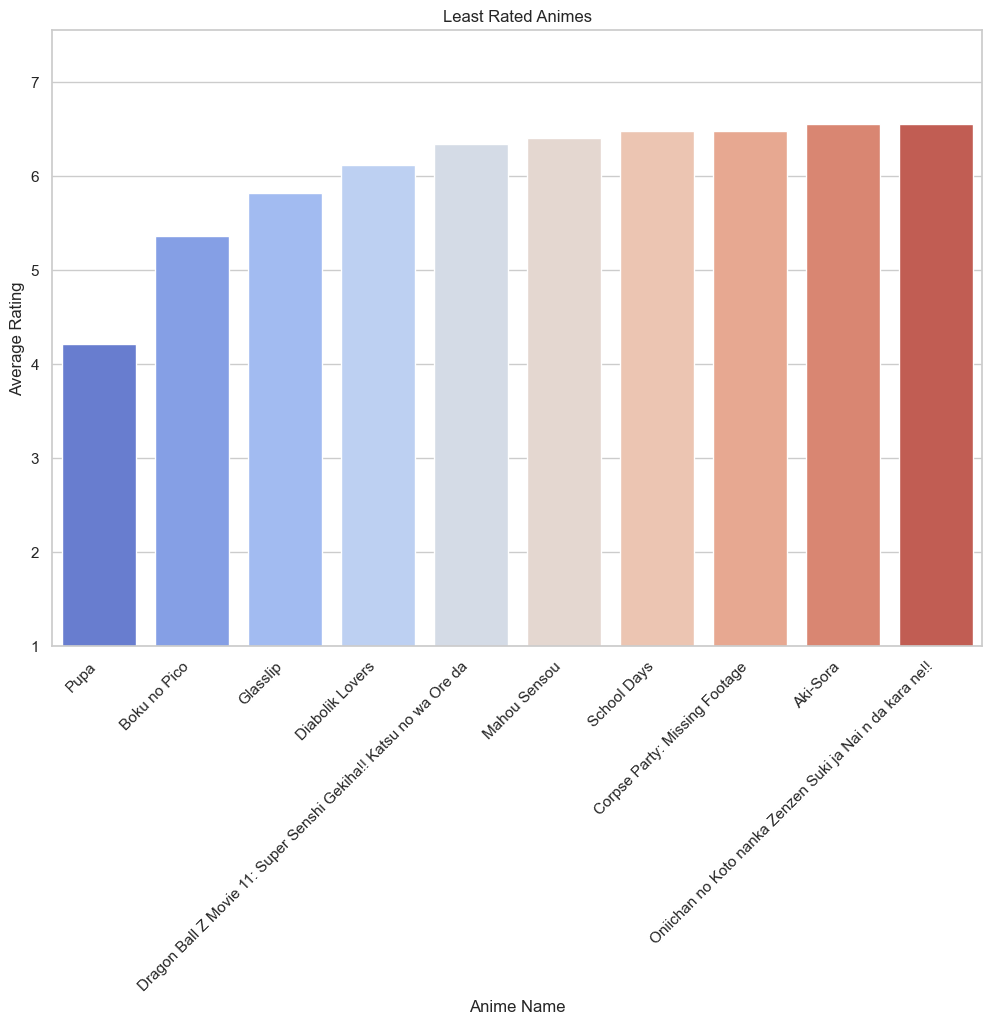

In [31]:
# Calculate the mean rating across the entire dataset
C = train_df_copy['rating'].mean()

# Define a minimum number of ratings required to be listed in the chart
m = anime_popularity['number_of_ratings'].quantile(0.90)

# Filter qualified animes
qualified_animes = anime_popularity[anime_popularity['number_of_ratings'] >= m]

# Calculate the weighted rating
qualified_animes['weighted_rating'] = (qualified_animes['number_of_ratings'] / (qualified_animes['number_of_ratings'] + m) * qualified_animes['average_rating']) + (m / (qualified_animes['number_of_ratings'] + m) * C)

# Least Rated Animes with Most Number of Ratings
least_rated_most_ratings = qualified_animes.sort_values(by='average_rating', ascending=True).head(10)
least_rated_most_ratings = least_rated_most_ratings.merge(anime_df_copy[['anime_id', 'name']], left_index=True, right_on='anime_id')


# Set the Seaborn theme for the plots
sns.set_theme(style="whitegrid")

# Plot for Least Rated Animes with Most Number of Ratings
plt.figure(figsize=(12, 8))
bar_plot_most_ratings = sns.barplot(data=least_rated_most_ratings, x='name', y='average_rating', palette='coolwarm')
bar_plot_most_ratings.set_title("Least Rated Animes")
bar_plot_most_ratings.set_xlabel("Anime Name")
bar_plot_most_ratings.set_ylabel("Average Rating")
bar_plot_most_ratings.set_xticklabels(bar_plot_most_ratings.get_xticklabels(), rotation=45, horizontalalignment='right')

# Set the y-axis to start at 1 and end at the maximum average rating + a buffer
y_min = 1
y_max = least_rated_most_ratings['average_rating'].max() + 1
bar_plot_most_ratings.set_ylim(y_min, y_max)

# Show the plot
plt.show()


**Insights**

 *Least Rated Animes with Most Number of Ratings*

 - The bar chart displays the ten anime titles with the lowest average ratings while considering the volume of ratings they have received.
 - Titles with notably low average ratings include Pupa, Boku no Pico, School Days, Glasslip, Diabolik Lovers, Mahou Sensou, Dragon Ball Z Movie 11: Super Senshi Gekiha!!, Amnesia, 11eyes, Dragon Ball GT, Green Green, and Final Fantasy: The Spirits Within. These animes are recognized for their lower ratings despite having a significant number of reviews.

**Genres Distribution**

* We will also check for the distribution of genres within our dataset. Understanding the distribution of genres is crucial for gaining insights into the variety and popularity of different anime genres.



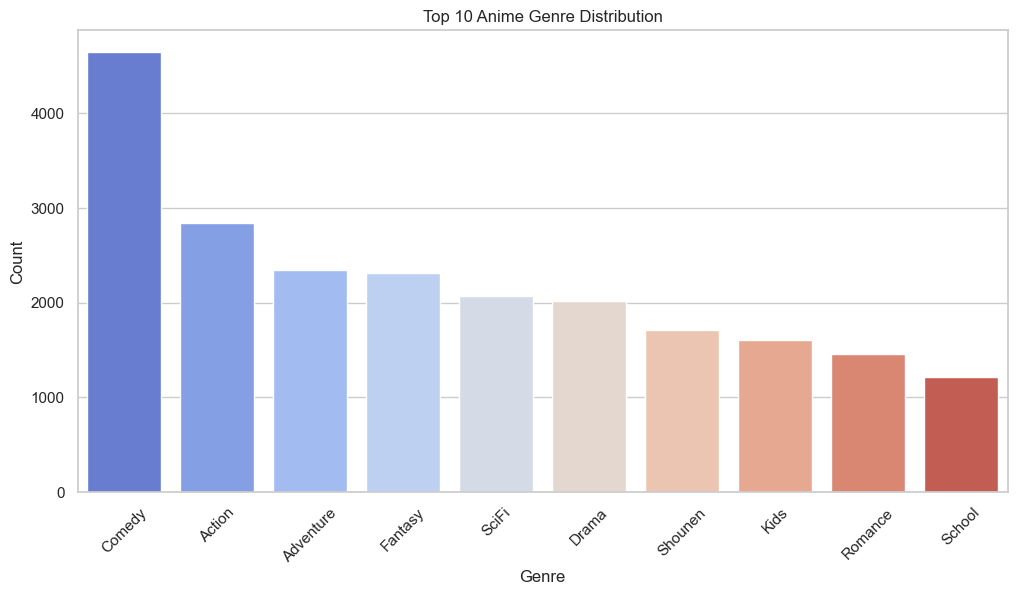

In [32]:
# Split genres into individual genres and create binary columns
genre_dummies = anime_df_copy['genre'].str.get_dummies(sep=',')

# Sum up the occurrences of each genre
genre_counts = genre_dummies.sum().sort_values(ascending=False).reset_index()
genre_counts.columns = ['Genre', 'Count']

# Get the top 10 genres
top_10_genres = genre_counts.head(10)

# Plot the distribution of top 10 anime genres using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Count', data=top_10_genres,palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Top 10 Anime Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

**Insights**

- From the analysis, we find that Comedy is the leading genre among all the genres. It is followed by Action, Adventure, Fantasy, Scifi, and drama. The ranking continues as observed in the graph.


**Word cloud for Average Ratings per Genre**

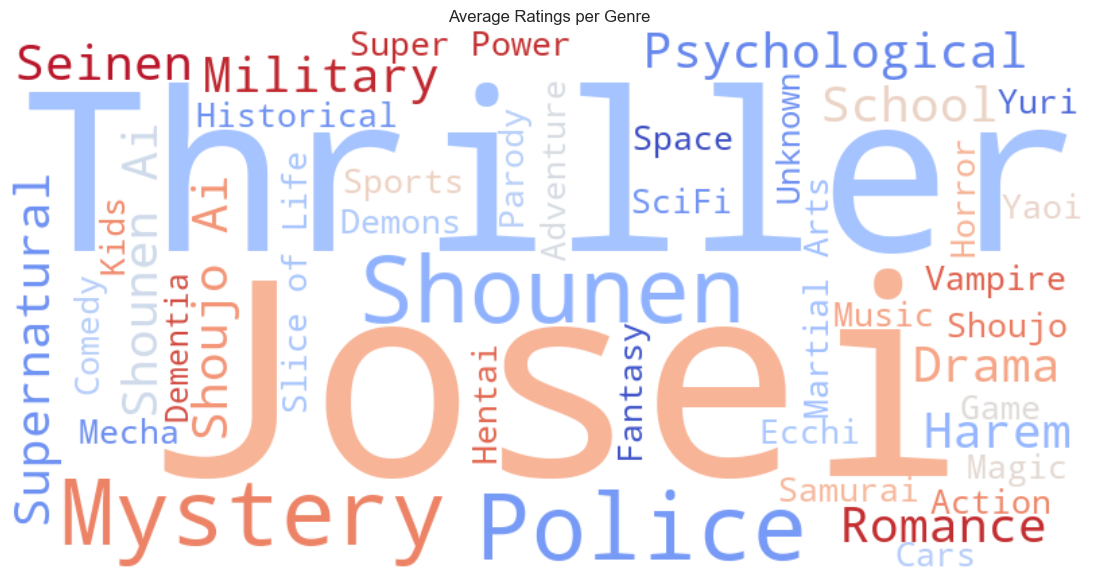

In [33]:

# Split genres into individual genres and create binary columns
genre_dummies = anime_df_copy['genre'].str.get_dummies(sep=',')

# Combine the dummies with the original DataFrame
anime_with_genres = anime_df_copy.join(genre_dummies)

# Melt the DataFrame to have one row per genre
melted_df = anime_with_genres.melt(id_vars=['rating'], value_vars=genre_dummies.columns, var_name='genre', value_name='has_genre')

# Filter only the rows where genre is present
melted_df = melted_df[melted_df['has_genre'] == 1]

# Calculate the average rating per genre
average_rating_per_genre = melted_df.groupby('genre')['rating'].mean().to_dict()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',colormap='coolwarm').generate_from_frequencies(average_rating_per_genre)

# Display the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Average Ratings per Genre')
plt.show()

**Insights**

* **Higher Rated Genres:** Larger text indicates genres with higher average ratings such as "Mystery," "Police," and "Thriller."
* **Lower Rated Genres:** Smaller text represents genres with lower average ratings  including "Yaoi," "Sports," and "Unknown."
* **Genre Diversity:** The cloud encompasses a wide array of genres like "Shounen," "Seinen," "Supernatural," "Drama," "Comedy," "Magic," "Historical," "Action," and "Sci-fi."


**Anime Type Distribution**

 * Let's also check the distribution of anime types. 

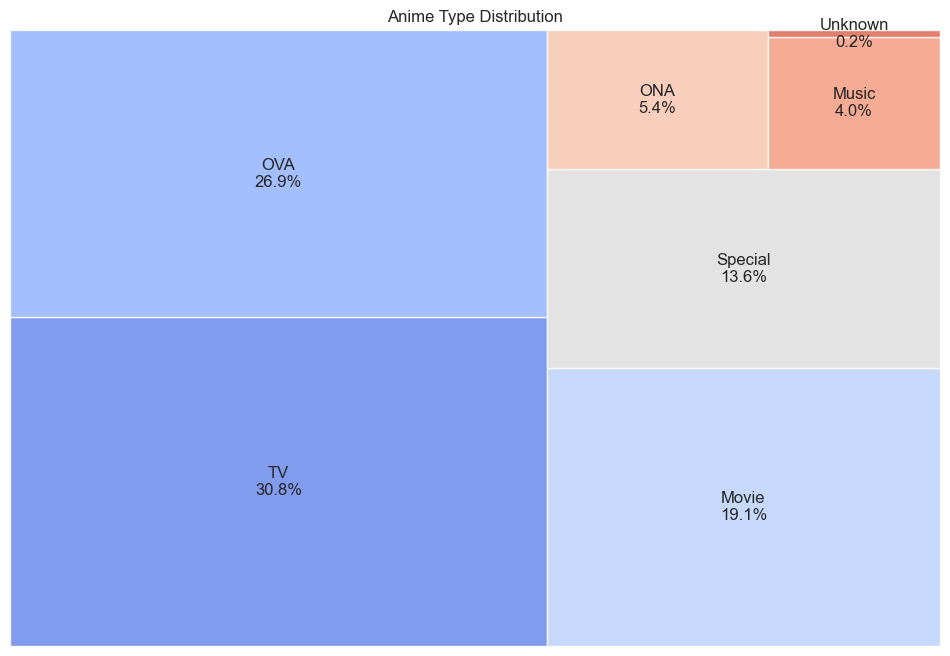

In [34]:


# Count anime types
type_counts = anime_df_copy['type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']

# Compute percentage for each type
total_count = type_counts['Count'].sum()
type_counts['Percentage'] = (type_counts['Count'] / total_count) * 100
type_counts['Label'] = type_counts.apply(lambda row: f"{row['Type']}\n{row['Percentage']:.1f}%", axis=1)

# Create a treemap
plt.figure(figsize=(12, 8))
colors = sns.color_palette('coolwarm', len(type_counts))

# Plot the treemap
squarify.plot(
    sizes=type_counts['Count'], 
    label=type_counts['Label'], 
    color=colors, 
    alpha=.8
)

# Add title
plt.title('Anime Type Distribution')

# Remove axes
plt.axis('off')

# Show the plot
plt.show()


**Insights**

- From the treemap, we can clearly observe that there are seven different types into which anime can be categorized.
- TV anime series are the most popular type, making up 30.8% of the total.
- Followed by OVAs and Movies: OVAs (26.9%) and Movies (19.1%) together represent a substantial 46% of the anime landscape.
- ONA (5.4%) and Music (4.0%) categories cater to specific audience preferences.
- Only 0.2% of anime types are uncategorized, indicating a well-established categorization system.


**Rating Distribution**
 - To better understand user preferences, we will analyze the distribution of ratings given by users.

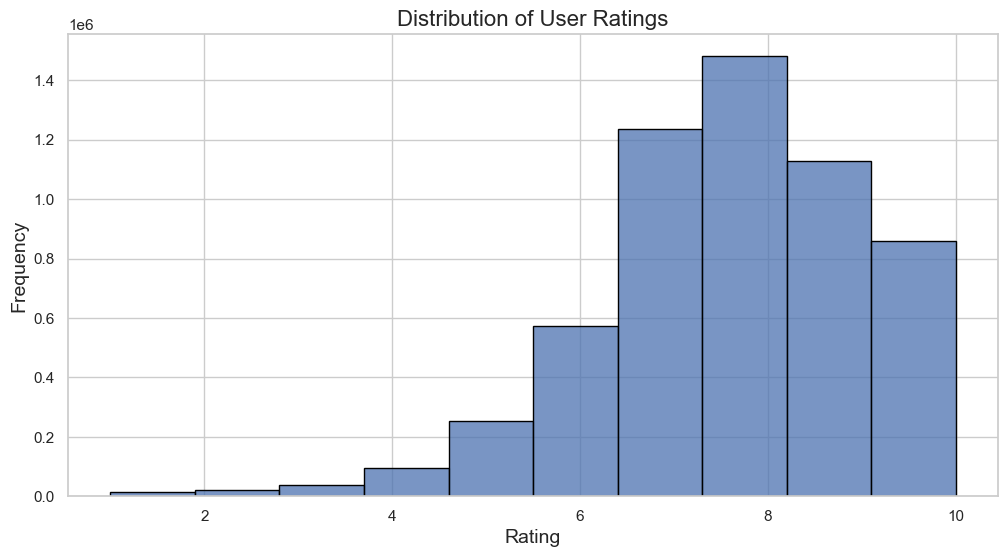

In [35]:

# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(train_df_copy['rating'], bins=10, kde=False, edgecolor='black')

# Customize the plot
plt.title('Distribution of User Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


**Insights**


   * The histogram reveal that anime ratings generally trend positively. The most common rating is 8, indicating a favorable user opinion. Ratings are skewed towards higher values, with a frequent occurrence of ratings between 6 and 10, and fewer ratings below 4 or above 9.

**Average Rating per Anime**

Analyzing the average rating per anime helps us understand how different animes are perceived by users. Due to the large dataset, we will sample our data for visualization purposes: `frac=0.01`.


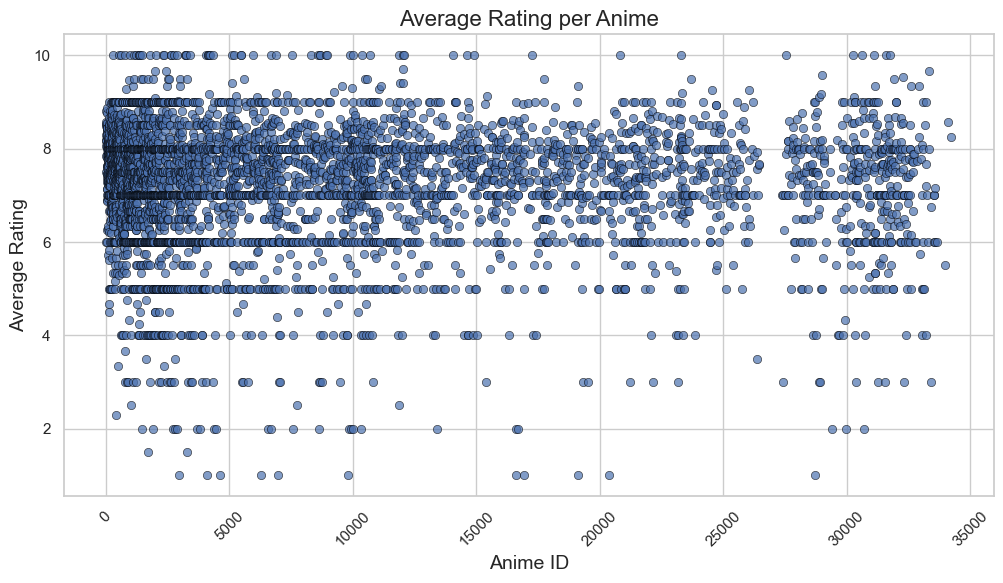

In [36]:

# Sample the DataFrame
sampled_df = train_df_copy.sample(frac=0.01, random_state=42)  

# Calculate the average rating per anime using the sampled DataFrame
average_rating_per_anime = sampled_df.groupby('anime_id')['rating'].mean().reset_index(name='avg_rating')

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=average_rating_per_anime, x='anime_id', y='avg_rating', edgecolor='black', alpha=0.7)

# Customize the plot
plt.title('Average Rating per Anime', fontsize=16)
plt.xlabel('Anime ID', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45)  

# Show the plot
plt.show()


**Insights**


- The average ratings appear to cluster primarily between 6 and 8, suggesting a concentration of anime within this rating range.
- There is also a noticeable spread towards lower ratigs below 6 and higher ratings above 8, indicating the presence of both highly-rated and lower-rated anime.

- The plots doesn't reveal a discernible pattern between the anime ID and the average rating.



**Correlation Heatmap**

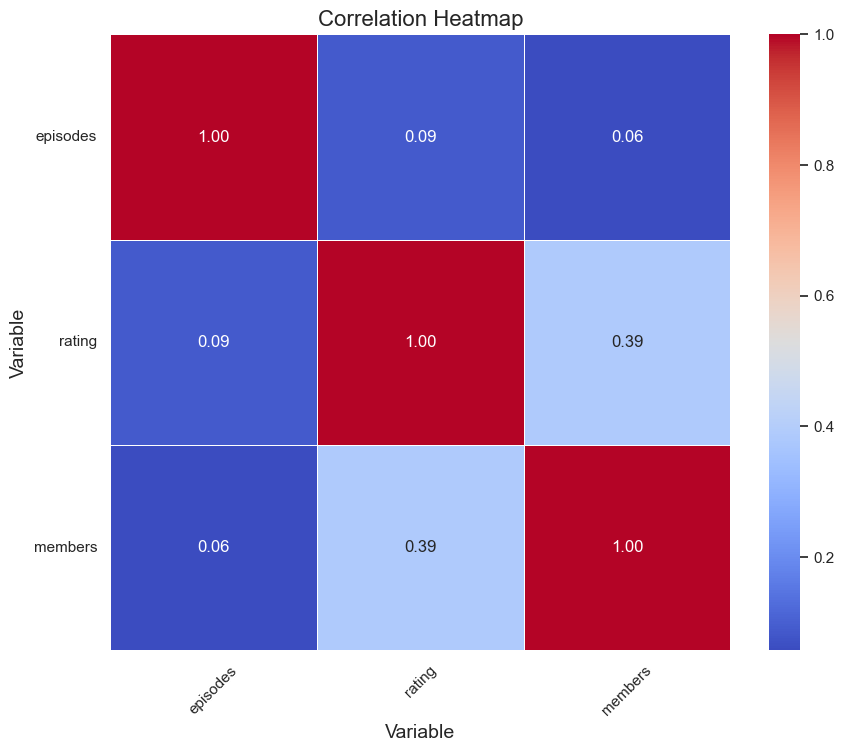

In [37]:

# Create a DataFrame for the heatmap
heatmap_data = anime_df_copy[['episodes', 'rating', 'members']]

# Calculate the correlation matrix
corr_matrix = heatmap_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap', fontsize=16)
plt.xlabel('Variable', fontsize=14)
plt.ylabel('Variable', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.show()


**Insights**

* There's a moderate positive correlation between members and episodes.
* Very weak positive correlations exist between members and rating, and between rating and episodes.


##  6. Recommendation System Methods Based on Collaborative Filtering <a class="anchor" id="chapter6"></a>

### 6.1 Introduction to Collaborative Filtering

Collaborative Filtering (CF) is a popular technique used in recommendation systems to provide personalized recommendations based on past interactions between users and items. It operates under the principle that users with similar preferences will enjoy similar items.

**Types of Collaborative Filtering**

1. **User-Based Collaborative Filtering**:
    - **Concept**: Recommends items by finding users with similar preferences. If User A has similar tastes to User B, then User A is recommended items liked by User B.
   - **Use Case**: Best when user ratings are abundant and user preferences are well-defined.

3. **Item-Based Collaborative Filtering**:
    - **Concept**: Recommends items similar to those a user has already rated highly. If an item is similar to items a user has liked, it is recommended to them.
   - **Use Case**: More stable and scalable, suitable for large datasets where item similarity is more consistent.


4. **Model-Based Collaborative Filtering**:
    - **Concept**: Utilizes advanced algorithms to learn latent factors from the user-item interaction matrix. Techniques such as Singular Value Decomposition (SVD) and Non-Negative Matrix Factorization (NMF) are used to uncover underlying patterns in the data.
   - **Use Case**: Effective for capturing complex patterns and making accurate predictions in large-scale data.

### 6.2 Data Preparation

Surprise (Simple Python Recommendation System Engine) is a specialized Python library designed for building and evaluating recommendation systems. It significantly simplifies the development process by offering a comprehensive suite of pre-built algorithms and tools tailored for collaborative filtering.

Key Features of Surprise: 
Pre-Built Algorithms: Surprise includes implementations of popular algorithms like Singular Value Decomposition (SVD) and Non-Negative Matrix Factorization (NMF). This allows for quick experimentation with different techniques without having to develop these algorithms from scratch.

Data Handling: The library manages common data preprocessing tasks such as splitting datasets and normalizing ratings. This reduces the manual effort required and lets you focus more on developing and tuning your models.

User-Friendly API: Surprise offers an intuitive API(a set of tools and instructions) that simplifies the training, evaluation, and adjustment of recommendation models. Its design helps streamline the workflow, making it easier to implement and test collaborative filtering methods.

Evaluation Tools: Built-in metrics like Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) help assess model performance, allowing for straightforward evaluation and comparison of different recommendation strategies.

Using Surprise helps us efficiently develop and refine collaborative filtering models, focusing on optimizing recommendations and speeding up the development process.

#### 6.2.1 Importing Packages

In [39]:
from surprise import Dataset, Reader, SVD, BaselineOnly, NMF, accuracy
from surprise.model_selection import train_test_split
import pandas as pd
import numpy as np

#### 6.2.2 Loading and Splitting Data

We use the Reader object to parse the ratings data by specifying the rating scale (e.g., from 1 to 10). This allows the Surprise library to understand the range of possible ratings, which is crucial for accurately normalizing and processing the data.

Following this, we convert the pandas DataFrame into a Surprise Dataset object. This conversion is essential because the Surprise algorithms require data in this specific format. The Dataset.load_from_df function takes the DataFrame containing user IDs, anime IDs, and ratings, and prepares it for model training and evaluation.

In [40]:
# Define a Reader object with the rating_scale
reader = Reader(rating_scale=(train_df_copy['rating'].min(), train_df_copy['rating'].max()))

# Load the data from the DataFrame into a Surprise dataset
data = Dataset.load_from_df(train_df_copy[['user_id', 'anime_id', 'rating']], reader)

Next, we use the train_test_split function to divide our dataset into training and test sets. This split is crucial for evaluating how well our models perform on new, unseen data. Specifically:

Training Set (trainset): This subset is used to train our recommendation models. It includes the majority of the data and allows the models to learn patterns and relationships between users and items.

Validation Set (valset): This subset is reserved for evaluating the performance of our models. By testing the models on this separate data, we can assess how well they generalize to new data and avoid overfitting to the training set.

The test_size=0.2 parameter indicates that 20% of the data is set aside for validation, while the remaining 80% is used for training. Additionally, setting a random_state=42 ensures that the split is reproducible, so the same training and test sets are generated each time the code is run.

In [41]:
# Split the data into training and test sets
trainset, valset = train_test_split(data, test_size=0.2, random_state=42)

From here, we can then train our three models.
The models used are: Baseline Model, Singular Value Decomposition (SVD) and Non-negative Matrix Factorization (NMF)

### 6.3 Baseline Model

The BaselineOnly algorithm in Surprise provides a straightforward approach to generating recommendations by estimating predictions based on baseline estimates. This method focuses on capturing the average ratings for users and items, along with their biases, rather than using complex patterns or interactions.

How It Works:

User Bias: This is the deviation of a user’s average rating from the global average rating.

Item Bias: This is the deviation of an item’s average rating from the global average rating.

Global Average: The overall average rating across all users and items.

The BaselineOnly algorithm calculates predictions by combining these biases with the global average, providing a simple but effective benchmark.

#### 6.3.1 Training the Baseline Model

In [42]:
from surprise import Dataset, Reader, BaselineOnly
from surprise.model_selection import train_test_split

# Train Baseline Model
baseline_algo = BaselineOnly()
baseline_algo.fit(trainset)

Estimating biases using als...


#### 6.3.2 Evaluating the Baseline Model

Evaluating the Baseline Model involves assessing its performance using various metrics to understand how well it predicts user ratings. Here, we focus on the Root Mean Squared Error (RMSE), which is a key metric for evaluating prediction accuracy.

RMSE measures the square root of the average squared differences between the predicted ratings and the actual ratings. It quantifies the magnitude of prediction errors and is particularly sensitive to larger errors, giving them more weight.
By calculating RMSE, we assess how close the model's predictions are to the actual ratings. A lower RMSE value indicates that the model's predictions are more accurate, suggesting better performance.

In [43]:
# Make predictions
predictions = baseline_algo.test(valset)

# Compute RMSE
baseline_rmse = accuracy.rmse(predictions)
print(f"Baseline RMSE: {baseline_rmse}")

RMSE: 1.2071
Baseline RMSE: 1.2071433117897423


The Baseline Model uses simple baseline estimates derived from user and item biases to make predictions. The RMSE value of 1.2071 reflects the average magnitude of errors between predicted and actual ratings, providing a fundamental benchmark for comparison with more sophisticated models. This helps us understand the model's performance based on basic predictive techniques and sets a baseline for evaluating more complex recommendation algorithms.

### 6.4 Singular Value Decomposition (SVD) Model

The Singular Value Decomposition (SVD) algorithm is a powerful matrix factorization technique used for generating recommendations. It is a model-based collaborative filtering approach that leverages latent factors to uncover underlying patterns in user-item interactions.

How It Works:

Latent Factors: SVD breaks down the user-item interaction matrix into three smaller matrices that reveal hidden patterns. These patterns help us understand the underlying reasons behind user preferences and item ratings.

Matrix Factorization: The process simplifies the original matrix into two smaller matrices—one for user preferences and one for item features. This reduction helps us capture the essence of user and item relationships without dealing with the full complexity of the original data.

Prediction: By combining these smaller matrices, SVD reconstructs the original matrix and predicts missing ratings. This allows the model to suggest items that users are likely to enjoy based on the discovered patterns.

SVD offers a more advanced approach to recommendation systems compared to simple baseline models. It improves prediction accuracy by identifying and leveraging these hidden relationships, resulting in more personalized and relevant recommendations.

#### 6.4.1 Training the SVD Model

In [44]:
# Initialize the SVD algorithm
SVD_algo = SVD()

# Train the model on the training data
SVD_algo.fit(trainset)

#### 6.4.2 Evaluating the SVD Model

We evaluate the model using RMSE, just like we do with the Baseline.

In [45]:
# Make predictions on the test set
predictions = SVD_algo.test(valset)

# Compute and print the RMSE
SVD_rmse = accuracy.rmse(predictions)
print(f"SVD RMSE: {SVD_rmse}")

RMSE: 1.1450
SVD RMSE: 1.144972416663246


The Singular Value Decomposition (SVD) model achieved an RMSE of 1.1439 on the validation set. The SVD model decomposes the user-item interaction matrix into latent factors, capturing more complex patterns in user preferences and item characteristics compared to the Baseline Model. The lower RMSE value of 1.1439 indicates that the SVD model’s predictions are closer to the actual ratings than those of the Baseline Model.

This improvement in RMSE highlights the effectiveness of SVD in capturing hidden relationships and making more accurate predictions. By leveraging latent features, SVD goes beyond simple biases and provides a more nuanced approach to recommendation, leading to better performance in terms of prediction accuracy.

### 6.5 Non-negative Matrix Factorization (NMF) Model

The Non-Negative Matrix Factorization (NMF) algorithm is another effective technique for generating recommendations. Like SVD, NMF is a model-based collaborative filtering approach that helps in uncovering hidden patterns in user-item interactions, but it operates under a key constraint.

How It Works:

Latent Factors: NMF decomposes the user-item interaction matrix into two smaller matrices, representing user preferences and item features, with a crucial restriction that all values must be non-negative. This means the values cannot be less than zero, which can make the results more interpretable.

Matrix Factorization: By breaking down the original matrix into these non-negative components, NMF captures the underlying structure of the data while ensuring that all factors contribute positively to the final predictions.

Prediction: The model reconstructs the original matrix from these non-negative components to predict missing ratings. This allows NMF to generate recommendations based on the patterns it has learned while adhering to the non-negativity constraint.

NMF offers a valuable alternative to SVD by providing a different perspective on the hidden patterns in the data. Its constraint on non-negative values can lead to more interpretable results, enhancing the model's ability to make relevant and personalized recommendations.

#### 6.5.1 Training the NMF Model

In [46]:
from surprise import NMF
# Initialize the NMF algorithm
NMF_algo = NMF()

# Train the model on the training data
NMF_algo.fit(trainset)

#### 6.5.2 Evaluating the NMF Model

We evaluate the model using RMSE, just like we do with the Baseline and SVD models.

In [68]:
# Make predictions on the test set
predictions = NMF_algo.test(valset)

# Compute and print the RMSE
NMF_rmse = accuracy.rmse(predictions)
print(f"NMF RMSE: {NMF_rmse}")

RMSE: 2.2194
NMF RMSE: 2.2193635690239453


The Non-Negative Matrix Factorization (NMF) model achieved an RMSE of 2.2236 on the validation set. The RMSE value of 2.2362 indicates that the predictions made by the NMF model deviate more from the actual ratings compared to the Baseline Model and the SVD model. This higher RMSE suggests that, in this case, NMF's ability to accurately predict ratings is less effective than the SVD model's.

The relatively higher RMSE for NMF might be attributed to its non-negativity constraint, which can limit its flexibility in capturing the complex patterns present in the data. While NMF provides a different approach with its own advantages, such as interpretability due to non-negative factors, it may not always match the performance of other methods like SVD in certain contexts.

### 6.6 Model Comparison

In this section, we compare the performance of the different recommendation models to evaluate their effectiveness in generating accurate predictions. By examining metrics such as Root Mean Squared Error (RMSE), we can assess how well each model performs and identify which approach delivers the most accurate and reliable recommendations. Below we see a bar graph showing the different RMSE values for each of the tested models.

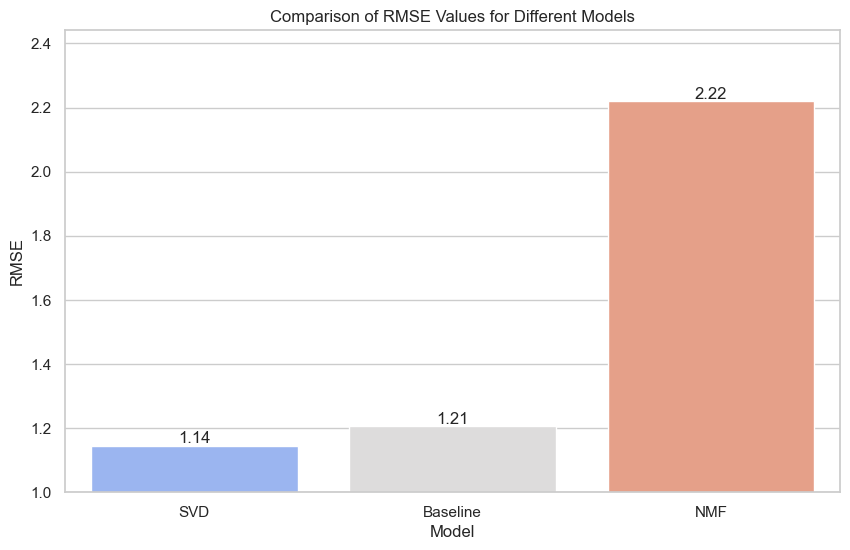

In [48]:
# Prepare data for plotting
models = ['SVD', 'Baseline', 'NMF']
rmse_values = [SVD_rmse, baseline_rmse, NMF_rmse]

# Create a DataFrame for plotting
results_df = pd.DataFrame({
    'Model': models,
    'RMSE': rmse_values
})

# Plot the RMSE values
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='RMSE', data=results_df, palette='coolwarm')

# Set y-axis limit to start from 1 and extend a bit beyond the max RMSE
plt.ylim(1, max(rmse_values) * 1.1)

# Add data labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points')

# Add titles and labels
plt.title('Comparison of RMSE Values for Different Models')
plt.xlabel('Model')
plt.ylabel('RMSE')

# Show the plot
plt.show()

The bar graph above visually compares the Root Mean Squared Error (RMSE) values of the three recommendation models: SVD, Baseline, and NMF.

SVD: With an RMSE of 1.14, the Singular Value Decomposition (SVD) model shows the best performance. This lower RMSE indicates that SVD's predictions are closer to the actual ratings, demonstrating its ability to capture more complex user-item interactions effectively.

Baseline Model: The Baseline Model, with an RMSE of 1.21, serves as a reference point. It performs reasonably well but does not capture complex patterns as effectively as SVD, resulting in a higher RMSE.

NMF: The Non-Negative Matrix Factorization (NMF) model has the highest RMSE of 2.22 among the three. This suggests that NMF's predictions are less accurate compared to both SVD and the Baseline Model. The higher RMSE reflects NMF's limitations in capturing the nuances of user-item interactions compared to the other models.

Overall, the bar graph highlights that SVD outperforms both the Baseline and NMF models in terms of prediction accuracy. The Baseline Model provides a useful benchmark, while NMF, despite its specialized approach, shows relatively lower accuracy. This visual comparison helps to quickly identify the model that delivers the most accurate recommendations based on the RMSE metric.

### 6.7 Making Predictions

In this section, we generate predictions for our test dataset (test_df_copy) using our best-performing model, which is the SVD model. The goal is to predict ratings for specific users and various anime (anime IDs). By applying the SVD model, we aim to estimate how users might rate different animes based on the patterns and relationships learned during the training phase.

In [49]:
# Use the best model (SVD in this case) to predict ratings for the test data
# Prepare the testset for prediction
testset_for_prediction = [(row['user_id'], row['anime_id'], 0) for _, row in test_df_copy.iterrows()]

# Make predictions
predictions = SVD_algo.test(testset_for_prediction)

# Generate the submission file
submission = pd.DataFrame([(f"{pred.uid}_{pred.iid}", pred.est) for pred in predictions], columns=['ID', 'rating'])

# Round the ratings to one decimal place
submission['rating'] = submission['rating'].round(1)

# submission.to_csv('submission.csv', index=False)
# print("Submission file created successfully.")

# Print the first few rows of the submission DataFrame
print(submission.head())

            ID  rating
0  40763_21405     5.5
1  68791_10504     8.0
2   40487_1281     7.2
3    55290_165     7.3
4  72323_11111     8.6


### 6.8 Generating and Using Predictions

In this section, we demonstrate how to use the SVD model to make various types of predictions and recommendations. Below, we will explore different functions to predict ratings for specific users and anime, generate personalized recommendations, and identify popular or highly-rated anime.

#### 6.8.1. Predicting Ratings for Specific User-Anime Pairs

The function below predicts the rating a specific user might give to a particular anime. By inputting a user ID and anime ID, the function returns the estimated rating, allowing us to understand how the model anticipates the user will rate the anime.

In [50]:
# Example function to get predicted rating for a specific user and anime
def get_predicted_rating(user_id, anime_id):
    prediction = SVD_algo.predict(user_id, anime_id)
    return prediction.est

# Example usage
user_id = 1  # Replace with the user ID you want to check
anime_id = 11617  # Replace with the anime ID you want to check
predicted_rating = get_predicted_rating(user_id, anime_id)
print(f"Predicted rating for user {user_id} on anime {anime_id}: {predicted_rating}")

Predicted rating for user 1 on anime 11617: 9.645647400582149


#### 6.8.2. Generating Top-N Recommendations for a User

This function provides personalized recommendations by suggesting the top-N anime that a user has not yet rated but is likely to enjoy. It excludes anime already rated by the user and ranks the remaining options based on predicted ratings. The anime IDs for recommended shows are given.

In [51]:
# Example function to get top-N recommendations for a user
def get_top_N_recommendations(user_id, N=10):
    # List all anime ids
    all_anime_ids = train_df_copy['anime_id'].unique()

    # Remove the ones that the user has already rated
    user_rated_anime_ids = train_df_copy[train_df_copy['user_id'] == user_id]['anime_id']
    anime_to_predict = np.setdiff1d(all_anime_ids, user_rated_anime_ids)

    # Make predictions for the items that the user hasn't rated yet
    predictions = [SVD_algo.predict(user_id, anime_id) for anime_id in anime_to_predict]

    # Sort predictions by estimated rating in descending order
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Extract top-N anime ids from predictions
    top_N_anime_ids = [pred.iid for pred in predictions[:N]]

    return top_N_anime_ids

# Example usage
user_id = 1  # Replace with the user ID you want to generate recommendations for
top_N_anime_ids = get_top_N_recommendations(user_id, N=10)
print(f"Top-N recommendations for user {user_id}: {top_N_anime_ids}")

Top-N recommendations for user 1: [28977, 918, 8074, 4752, 3457, 9989, 32281, 32935, 23273, 22199]


#### 6.8.3. Identifying Popular or Highly-Rated Anime

This function identifies the top-N anime based on the most popular anime. By the most recurring animes being rated in the dataset and sorting them, it highlights the most popular items across the dataset. This can be used when a user is new and doesn't have a user id as yet (The cold start problem). In this case, the highest-rated anime are recommended, and their anime IDs are given as a starting place for the new user.

In [52]:
def get_top_N_popular_items(N=10):
    # Recommend top-N most popular items based on overall ratings
    top_N_items = train_df_copy['anime_id'].value_counts().index[:N].tolist()
    return top_N_items

# Example usage
top_N_popular_items = get_top_N_popular_items(N=10)
print(f"Top-N popular items recommended for new users based on frequency: {top_N_popular_items}")

Top-N popular items recommended for new users based on frequency: [1535, 11757, 16498, 1575, 6547, 226, 20, 5114, 121, 2904]


The next function identifies the top-N anime based on the highest average ratings. By calculating the average ratings for each anime and sorting them, it highlights the most appreciated items across the dataset. This can be used when a user is new and doesn't have a user id as yet (The cold start problem). In this case, the highest-rated anime are recommended, and their anime IDs are given as a starting place for the new user.

In [53]:
def get_top_N_popular_items(N=10):
    # Compute the average rating for each anime
    avg_ratings = train_df_copy.groupby('anime_id')['rating'].mean()

    # Sort by average rating in descending order and get the top-N items
    top_N_items = avg_ratings.sort_values(ascending=False).head(N).index.tolist()

    return top_N_items

# Example usage
top_N_popular_items = get_top_N_popular_items(N=10)
print(f"Top-N popular items based on highest average ratings: {top_N_popular_items}")

Top-N popular items based on highest average ratings: [31211, 34252, 24073, 10113, 23349, 9820, 9819, 30289, 9817, 22615]


#### 6.8.4. Retrieving Anime Information and Making Predictions by Name

Since users typically do not know anime IDs, we developed the following functions to allow users to input the name of an anime instead. These functions first convert the anime name to its corresponding ID and then use the SVD model to predict the rating. This approach offers a more intuitive and user-friendly way to obtain predictions without requiring users to know specific anime IDs.

In [40]:
def get_anime_id_by_name(anime_name, anime_metadata):
    """Retrieve the anime ID from the anime name."""
    anime_name = anime_name.strip().lower()
    matches = anime_metadata[anime_metadata['name'].str.lower() == anime_name]
    if not matches.empty:
        return matches['anime_id'].values[0]
    else:
        print(f"Anime name '{anime_name}' not found.")
        return None

def predict_rating(user_id, anime_name, model, anime_metadata):
    """Predict the rating for a given user and anime name."""
    anime_id = get_anime_id_by_name(anime_name, anime_metadata)
    if anime_id is not None:
        prediction = model.predict(user_id, anime_id)
        return prediction.est
    else:
        return None

# Example usage
def main():
    user_id_input = int(input("Enter user ID: "))
    anime_name_input = input("Enter anime name: ")

    predicted_rating = predict_rating(user_id_input, anime_name_input, SVD_algo, anime_df_copy)

    if predicted_rating is not None:
        print(f"Predicted rating for '{anime_name_input}' by user {user_id_input}: {predicted_rating:.2f}")
    else:
        print("Could not predict rating due to missing anime ID or other issues.")

if __name__ == "__main__":
    main()

ValueError: invalid literal for int() with base 10: ''

To make the recommendation system more accessible, especially for both users who know specific anime IDs and users who do not, we’ve implemented functions to handle inputs based on anime names or IDs. This allows users to input either an anime name or an ID and receive a predicted rating for that anime. As seen below:

In [ ]:
def get_anime_id(anime_input, anime_metadata):
    """Retrieve the anime ID from the anime name or ID."""
    # Check if input is numeric
    if anime_input.isdigit():
        return int(anime_input)
    else:
        # Treat input as anime name
        anime_name = anime_input.strip().lower()
        matches = anime_df_copy[anime_df_copy['name'].str.lower() == anime_name]
        if not matches.empty:
            return matches['anime_id'].values[0]
        else:
            print(f"Anime name '{anime_name}' not found.")
            return None

def predict_rating(user_id, anime_input, model, anime_metadata):
    """Predict the rating for a given user and anime name or ID."""
    anime_id = get_anime_id(anime_input, anime_metadata)
    if anime_id is not None:
        prediction = model.predict(user_id, anime_id)
        return prediction.est, anime_id
    else:
        return None, None

# Example usage
def main():
    user_id_input = int(input("Enter user ID: "))
    anime_input = input("Enter anime name or ID: ")

    predicted_rating, anime_id = predict_rating(user_id_input, anime_input, SVD_algo, anime_df_copy)

    if predicted_rating is not None:
        # Fetch the anime name for display
        anime_name = anime_df_copy.loc[anime_df_copy['anime_id'] == anime_id, 'name'].values[0]
        print(f"Predicted rating for '{anime_name}' (Anime ID: {anime_id}) by user {user_id_input}: {predicted_rating:.2f}")
    else:
        print("Could not predict rating due to missing anime ID or other issues.")

if __name__ == "__main__":
    main()

Predicted rating for 'Spiral: Suiri no Kizuna' (Anime ID: 341) by user 3: 6.43


#### 6.8.5. Making Personalized Recommendations

Here's a user-friendly introduction for the get_top_N_recommendations function and its usage:

To enhance user experience, we’ve designed a function that makes it easy for users to get personalized anime recommendations without needing to know specific anime IDs. Instead, users can simply enter their user ID and specify how many recommendations they want. This method allows users to receive tailored anime suggestions in a straightforward and intuitive way, enhancing their overall experience with the recommendation system.

In [28]:
def get_top_N_recommendations(user_id, model, anime_metadata, N=10):
    """Recommend top-N anime for a given user."""
    # Get all anime IDs
    all_anime_ids = anime_metadata['anime_id'].tolist()

    # Generate predictions for all anime for the given user
    predictions = [model.predict(user_id, anime_id) for anime_id in all_anime_ids]

    # Sort predictions by estimated rating in descending order
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Extract top-N anime IDs
    top_N_anime_ids = [pred.iid for pred in predictions[:N]]

    # Map anime IDs to names
    top_N_anime_names = anime_metadata[anime_metadata['anime_id'].isin(top_N_anime_ids)]['name'].tolist()

    return top_N_anime_names

# Example usage
def main():
    user_id_input = int(input("Enter user ID: "))
    N = int(input("Enter number of recommendations (N): "))

    top_N_anime_names = get_top_N_recommendations(user_id_input, SVD_algo, anime_df_copy, N=N)

    print(f"Top-{N} recommendations for user {user_id_input}:")
    for idx, name in enumerate(top_N_anime_names, start=1):
        print(f"{idx}. {name}")

if __name__ == "__main__":
    main()

Top-10 recommendations for user 1:
1. Kimi no Na wa.
2. Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou
3. Ansatsu Kyoushitsu (TV) 2nd Season
4. Yuu☆Yuu☆Hakusho
5. Berserk
6. Fairy Tail
7. Bleach
8. High School DxD New
9. Sword Art Online
10. High School DxD


#### 6.8.6. Practical Implementation of Recommendations

For the next function, we leverage the functions we've developed to offer tailored recommendations and insights based on user preferences. Here's how it works:

Personalized Recommendations:
If a valid user ID is provided, the system generates personalized anime recommendations using the get_top_N_recommendations function. This function utilizes the SVD model to predict ratings for all available anime and selects the top-N recommendations based on these predictions. Detailed information about each recommended anime, such as genre, type, episodes, rating, and number of members, is displayed to the user.
General Recommendations:

If the user ID is not found, the system provides general recommendations. This includes:
Most Frequently Watched Anime: Identified by counting the number of ratings for each anime. This helps highlight popular choices among users.
Highest Rated Anime: Determined by sorting anime based on their average rating. This highlights top-rated anime that might be of interest as a starting point for new users without a user id as yet so as to address the Cold Start problem in our purely collaborative-based filtering recommender system.

In [29]:
def get_top_N_recommendations(user_id, model, anime_metadata, N=10):
    """Recommend top-N anime for a given user and return detailed information."""
    all_anime_ids = anime_metadata['anime_id'].tolist()
    predictions = [model.predict(user_id, anime_id) for anime_id in all_anime_ids]
    predictions.sort(key=lambda x: x.est, reverse=True)
    top_N_anime_ids = [pred.iid for pred in predictions[:N]]
    top_N_anime_info = anime_metadata[anime_metadata['anime_id'].isin(top_N_anime_ids)]
    return top_N_anime_info

def get_most_frequent_anime(anime_metadata, N=10):
    """Get top-N most frequently watched anime based on count of ratings."""
    top_N_anime_ids = train_df_copy['anime_id'].value_counts().index[:N].tolist()
    top_N_anime_info = anime_metadata[anime_metadata['anime_id'].isin(top_N_anime_ids)]
    return top_N_anime_info

def get_highest_rated_anime(anime_metadata, N=10):
    """Get top-N highest rated anime based on average rating."""
    top_N_anime_info = anime_metadata.sort_values(by='rating', ascending=False).head(N)
    return top_N_anime_info

def main():
    user_id_input = int(input("Enter user ID: "))
    N = int(input("Enter number of recommendations (N): "))

    if user_id_input in train_df_copy['user_id'].unique():
        print(f"\nUser ID {user_id_input} found. Providing personalized recommendations.")
        top_N_anime_info = get_top_N_recommendations(user_id_input, SVD_algo, anime_df_copy, N)
        print(f"\nTop-{N} recommendations for user {user_id_input}:")
        print(top_N_anime_info[['name', 'anime_id', 'genre', 'type', 'episodes', 'rating', 'members']].to_string(index=False))
    else:
        print(f"\nUser ID {user_id_input} not found. Providing general recommendations.")

        # Get most frequent watched anime
        print("\nTop-N Most Frequently Watched Anime:")
        most_frequent_anime_info = get_most_frequent_anime(anime_df_copy, N)
        print(most_frequent_anime_info[['name', 'anime_id', 'genre', 'type', 'episodes', 'rating', 'members']].to_string(index=False))

        # Get highest rated anime
        print("\nTop-N Highest Rated Anime:")
        highest_rated_anime_info = get_highest_rated_anime(anime_df_copy, N)
        print(highest_rated_anime_info[['name', 'anime_id', 'genre', 'type', 'episodes', 'rating', 'members']].to_string(index=False))

if __name__ == "__main__":
    main()


User ID 1 found. Providing personalized recommendations.

Top-10 recommendations for user 1:
                                                     name  anime_id                                                                             genre  type  episodes  rating  members
                                           Kimi no Na wa.     32281                                                 Drama,Romance,School,Supernatural Movie         1    9.37   200630
Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou     32935                                                Comedy,Drama,School,Shounen,Sports    TV        10    9.15    93351
                       Ansatsu Kyoushitsu (TV) 2nd Season     30654                                                      Action,Comedy,School,Shounen    TV        25    8.68   176475
                                          Yuu☆Yuu☆Hakusho       392                          Action,Comedy,Demons,Fantasy,Martial Arts,School,Shounen    TV       112    8.47 

In this section, we delved into various collaborative filtering techniques to enhance anime recommendations. Here’s a concise summary of our findings:

Baseline Model:
This approach relies on simple user and item biases to predict ratings, providing a fundamental benchmark for evaluating more advanced models.

Singular Value Decomposition (SVD):
SVD offers a sophisticated method by decomposing the user-item interaction matrix into latent factors. This technique captures complex patterns and relationships, resulting in improved prediction accuracy over the baseline model.

Non-negative Matrix Factorization (NMF):
NMF, while similar to SVD, uses non-negative factors. Although it has its advantages, our evaluation revealed that it performed less effectively than SVD in terms of accuracy.

Model Evaluation:
The SVD model demonstrated superior performance with the lowest RMSE, indicating its effectiveness in making accurate predictions. As the top-performing model, SVD was utilized to showcase practical applications of the recommendation system.

Practical Applications:
We illustrated how these models can be applied to real-world scenarios, including predicting ratings and generating personalized or general recommendations based on user input.
Overall, these collaborative filtering techniques provide a solid foundation for recommendation systems, with SVD emerging as the most effective for capturing intricate user-item interactions and enhancing recommendation accuracy.

##  8. Hyperparameter Tuning <a class="anchor" id="chapter8"></a>

We will perform hyperparameter tuning for three different models: BaselineOnly, SVD, and NMF. Hyperparameter tuning involves finding the best combination of parameters that improve the performance of these models. And track model performance using ML FLOW

In [54]:
from surprise import Dataset, Reader, SVD, NMF, BaselineOnly
from surprise.model_selection import RandomizedSearchCV, train_test_split
import mlflow
import mlflow.sklearn
import numpy as np


### 7.1 Experiment Name

In [55]:
# Set the experiment name
mlflow.set_experiment("Collaborative Filtering Hyperparameter Tuning")


2024/08/06 15:10:56 INFO mlflow.tracking.fluent: Experiment with name 'Collaborative Filtering Hyperparameter Tuning' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///c:/Users/makhu/Downloads/EG7_2401FTDS_Unsupervised_Learning_Project_main-1/mlruns/319319208742932077', creation_time=1722949856798, experiment_id='319319208742932077', last_update_time=1722949856798, lifecycle_stage='active', name='Collaborative Filtering Hyperparameter Tuning', tags={}>

### 7.2 Param Distributions and Best RMSE results for each model

#### Singular Value Decomposition (SVD) Model

In [58]:
# Define the hyperparameter space for SVD
param_grid_svd = {
    'n_factors': [10, 20, 50, 100],
    'n_epochs': [20, 30, 50],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.1, 0.2]
}


In [59]:
# RandomizedSearchCV for SVD
random_search_svd = RandomizedSearchCV(
    SVD,
    param_distributions=param_grid_svd,
    n_iter=10,
    measures=['rmse'],
    cv=3,
    random_state=42,
    n_jobs=-1
)


In [60]:
# Start MLflow run for SVD
with mlflow.start_run(run_name="SVD Hyperparameter Tuning"):
    # Fit the model
    random_search_svd.fit(data)

    # Log best parameters and metrics
    best_params_svd = random_search_svd.best_params['rmse']
    best_score_svd = random_search_svd.best_score['rmse']
    mlflow.log_params(best_params_svd)
    mlflow.log_metric("best_rmse", best_score_svd)

    print(f"Best RMSE for SVD: {best_score_svd}")
    print(f"Best parameters for SVD: {best_params_svd}")

Best RMSE for SVD: 1.1504218641443584
Best parameters for SVD: {'n_factors': 10, 'n_epochs': 50, 'lr_all': 0.01, 'reg_all': 0.1}


### BaselineONLY

In [61]:
# Define the hyperparameter space for BaselineOnly
param_grid_baseline = {
    'bsl_options': {
        'method': ['als', 'sgd'],
        'n_epochs': [5, 10, 20],
        'reg_u': [1, 5, 10],
        'reg_i': [1, 5, 10],
        'learning_rate': [0.001, 0.005, 0.01]
    }
}

# RandomizedSearchCV for BaselineOnly
random_search_baseline = RandomizedSearchCV(
    BaselineOnly,
    param_distributions=param_grid_baseline,
    n_iter=10,
    measures=['rmse'],
    cv=3,
    random_state=42,
    n_jobs=-1
)

In [62]:
# Start MLflow run for BaselineOnly
with mlflow.start_run(run_name="BaselineOnly Hyperparameter Tuning"):
    # Fit the model
    random_search_baseline.fit(data)

    # Log best parameters and metrics
    best_params_baseline = random_search_baseline.best_params['rmse']
    best_score_baseline = random_search_baseline.best_score['rmse']
    mlflow.log_params(best_params_baseline)
    mlflow.log_metric("best_rmse", best_score_baseline)

    print(f"Best RMSE for BaselineOnly: {best_score_baseline}")
    print(f"Best parameters for BaselineOnly: {best_params_baseline}")

Best RMSE for BaselineOnly: 1.2013417955194121
Best parameters for BaselineOnly: {'bsl_options': {'method': 'als', 'n_epochs': 20, 'reg_u': 1, 'reg_i': 1, 'learning_rate': 0.001}}


### Non-negative Matrix Factorization (NMF) Model

In [63]:
# Define the hyperparameter space for NMF
param_grid_nmf = {
    'n_factors': [5, 10, 20, 30],
    'n_epochs': [20, 30, 50],
    'reg_pu': [0.01, 0.1, 0.5],
    'reg_qi': [0.01, 0.1, 0.5]
}

# RandomizedSearchCV for NMF
random_search_nmf = RandomizedSearchCV(
    NMF,
    param_distributions=param_grid_nmf,
    n_iter=10,
    measures=['rmse'],
    cv=3,
    random_state=42,
    n_jobs=-1
)


In [69]:
# Start MLflow run for NMF
with mlflow.start_run(run_name="NMF Hyperparameter Tuning"):
    # Fit the model
    random_search_nmf.fit(data)

    # Log best parameters and metrics
    best_params_nmf = random_search_nmf.best_params['rmse']
    best_score_nmf = random_search_nmf.best_score['rmse']
    mlflow.log_params(best_params_nmf)
    mlflow.log_metric("best_rmse", best_score_nmf)

    print(f"Best RMSE for NMF: {best_score_nmf}")
    print(f"Best parameters for NMF: {best_params_nmf}")

Best RMSE for NMF: 1.2365601518790694
Best parameters for NMF: {'n_factors': 30, 'n_epochs': 50, 'reg_pu': 0.5, 'reg_qi': 0.01}


**Summary:**

The experimentation and evaluation of the models revealed that SVD is the most suitable approach for the anime recommendation task, achieving an RMSE of 1.1549. This indicates its strength in handling complex user-item interactions through matrix factorization, making it a robust choice for collaborative filtering tasks.

The SVD model's superiority stems from its ability to uncover latent structures in the data, which translates to more personalized and accurate recommendations. Given its performance, deploying SVD in production environments for recommendation systems is likely to enhance user experience significantly by providing recommendations that closely align with user preferences.

### 7.4 Comparison of Best RMSE for each model

In [66]:
# Data for visualization
results = {
    'Model': ['SVD', 'BaselineOnly', 'NMF'],
    'Best RMSE': [1.1504, 1.2013, 1.2376]
    'Parameters': [
        {'n_factors': 10, 'n_epochs': 50, 'lr_all': 0.01, 'reg_all': 0.1},
        {'bsl_options': {'method': 'als', 'n_epochs': 20, 'reg_u': 1, 'reg_i': 1, 'learning_rate': 0.001}},
        {'n_factors': 30, 'n_epochs': 50, 'reg_pu': 0.5, 'reg_qi': 0.01}
    ]
}

# Convert to DataFrame for easier plotting
results_df = pd.DataFrame(results)


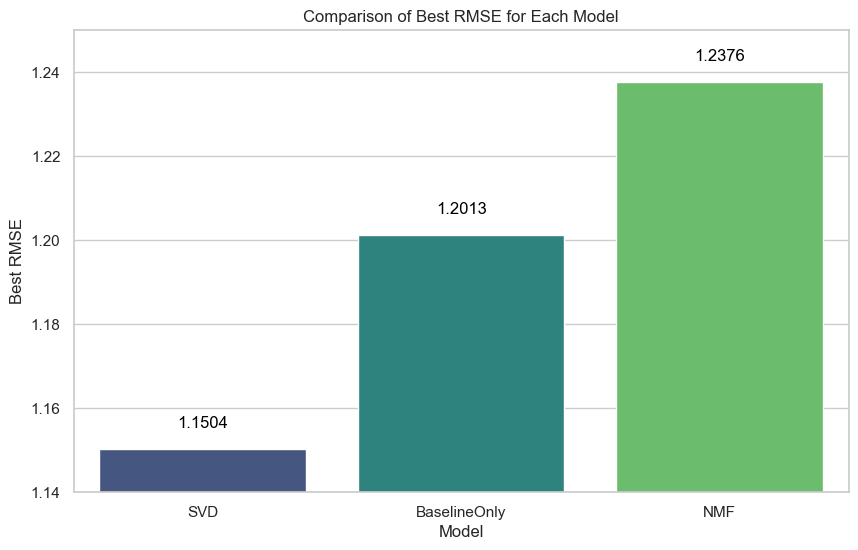

In [67]:
# Set plot style
sns.set(style="whitegrid")

# Create a bar plot for RMSE
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Best RMSE', data=results_df, palette='viridis')

# Annotate RMSE values on the bars
for index, row in results_df.iterrows():
    plt.text(index, row['Best RMSE'] + 0.005, f"{row['Best RMSE']:.4f}", color='black', ha="center")

plt.title('Comparison of Best RMSE for Each Model')
plt.ylim(1.14, 1.25)
plt.xlabel('Model')
plt.ylabel('Best RMSE')
plt.show()


## 9. Recommendations <a class="anchor" id="chapter9"></a>

To further enhance the user experience and address the problem of overwhelming choices in the anime realm, we recommend the following:

- Continuous Improvement of Algorithms: Regularly update and refine the recommendation algorithms to incorporate user feedback and emerging trends in the anime community. This will ensure that the app remains relevant and continues to provide high-quality recommendations.

- User Customization Options: Allow users to customize their recommendation preferences, such as adjusting the weight of different factors (e.g., genre, ratings, popularity). This can help users fine-tune the recommendations to better match their specific tastes.

- Incorporate Social Features: Introduce social features that enable users to share their favorite anime and recommendations with friends. This can create a community-driven platform where users can discover new shows through their social network.

- Enhanced Data Collection: Continuously gather and analyze user interaction data to better understand viewing habits and preferences. This can improve the accuracy of recommendations and provide insights into emerging trends in the anime world.

- Diverse Recommendation Methods: Expand the recommendation methods to include hybrid approaches that combine content-based, collaborative filtering, and other techniques, such as deep learning models. This can provide a more comprehensive and diverse set of recommendations.

- Regular Content Updates: Keep the anime library up to date with the latest releases and trending titles. This ensures that users have access to the most current and popular anime series.

## 10. Conclusion <a class="anchor" id="chapter10"></a>

The anime recommender app successfully addresses the challenge of finding personalized anime recommendations in the vast and diverse anime universe. By utilizing advanced content-based and collaborative filtering techniques, the app provides tailored suggestions that align closely with individual preferences and tastes. This approach overcomes the limitations of traditional recommendation methods, which often offer generic and uninspiring suggestions. As a result, AnimeXplore enhances the user experience, making it easier and more enjoyable for anime fans to discover new and exciting series that resonate with their unique interests.

## 11. Team Members <a class="anchor" id="chapte11"></a>

| Name            | Role                     |
|-----------------|---------------------------|
| Clement Mphethi | Lead Data Scientist      |
| Makhutjo Lehutjo | Project Manager    |
| Prishani Kisten   | Github Manager   |
| Johannes Malefetsane Makgetha      | Data Scientist|